In [0]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

# PCA

In [0]:
data_pulsar.head() ##Visualización de los datos

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
#Escalamiento 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_pulsar)
head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns = head)

X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

In [0]:
#Split de los datos
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

In [0]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
pca_cargas = pca.components_
pca_cargas

array([[ 4.11241251e-02,  2.02174246e-03, -2.41556652e-03,
        -1.33698538e-02, -1.11683957e-01, -1.12424819e-01,
         3.94725095e-02,  9.85621330e-01],
       [-4.76199607e-01, -4.56193590e-02,  2.08171523e-02,
         1.10708854e-01,  7.65766930e-01,  3.83582585e-01,
        -3.68888011e-02,  1.53517524e-01],
       [ 8.45024779e-01,  1.66859669e-01, -2.69975473e-02,
        -1.25579042e-01,  4.53650247e-01,  1.84667926e-01,
        -2.00562992e-02,  3.59021711e-02],
       [-4.78656973e-02,  4.26082592e-02, -4.83890692e-03,
        -2.32475536e-02,  4.37104978e-01, -8.93628352e-01,
         5.37684956e-02, -5.29726586e-02],
       [-2.13069665e-01,  9.16985871e-01, -2.53050854e-02,
        -3.30258921e-01, -4.96211824e-02,  3.91936921e-02,
        -5.11961535e-03,  1.52015020e-03],
       [ 9.74977478e-02,  3.56659498e-01,  1.08624424e-01,
         9.21245086e-01, -3.87279550e-02, -3.26539237e-02,
        -1.51682366e-02,  4.57624063e-04],
       [-5.78170873e-04, -9.513539

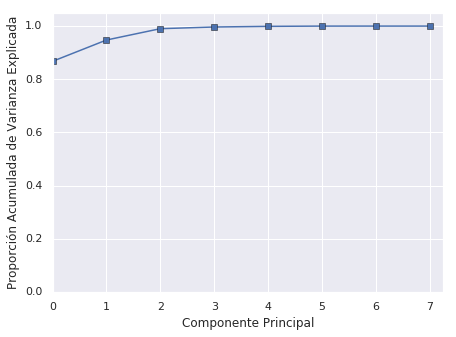

In [0]:
# Se obtiene la grafica de la PVE para los 8 componentes principales
plt.figure(figsize=(7,5))
plt.plot(range(0,8),np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0,7.25)
plt.ylim(0,1.05)
plt.xticks(range(0,8,1))
plt.show()

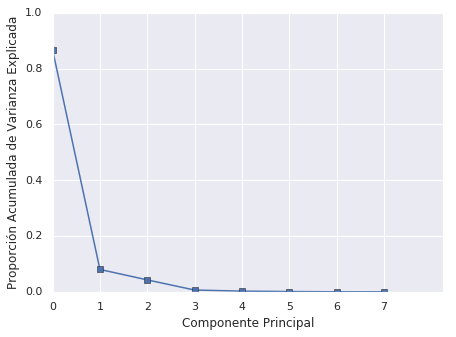

In [0]:
plt.figure(figsize=(7,5))
plt.plot(range(0,8),pca.explained_variance_ratio_, '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,8.25)
plt.ylim(0,1)
plt.xticks(range(0,8,1))
plt.show()

In [0]:
#Del analisis solo nos quedamos con los pesos que nos dan las 3 componentes principales
pesos_nuevo_espacio = pca_cargas[0:3]
pesos_nuevo_espacio

array([[ 0.04112413,  0.00202174, -0.00241557, -0.01336985, -0.11168396,
        -0.11242482,  0.03947251,  0.98562133],
       [-0.47619961, -0.04561936,  0.02081715,  0.11070885,  0.76576693,
         0.38358258, -0.0368888 ,  0.15351752],
       [ 0.84502478,  0.16685967, -0.02699755, -0.12557904,  0.45365025,
         0.18466793, -0.0200563 ,  0.03590217]])

In [0]:
Z_train_npa = pca.transform(X_train)[:,:3]
Z_train =pd.DataFrame(Z_train_npa)
Z_train.head()

,0,1,2
0,54.440826,-11.825550,8.178276
1,60.837862,-3.814422,-6.067730
2,21.003795,-20.171298,12.408113
3,-69.813435,-23.498930,8.154935
4,-9.918176,-11.688642,-9.193454


# CLASIFICACION DATA CON MENOS CARACTERISTICAS


## Algoritmo: Redes Neuronales por defecto

Error MSE:  0.026787181594083814


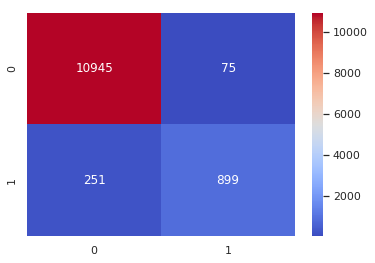

In [0]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier()

NN_model.fit(Z_train, y_train) 
y_train_predict= NN_model.predict(Z_train)

from sklearn.metrics import mean_squared_error
NN_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",NN_model_mse)

from sklearn.metrics import confusion_matrix
NN_model_cm = confusion_matrix(y_train, y_train_predict)   

sns.heatmap(NN_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9732128184059162
precision 0.9229979466119097
recall 0.7817391304347826
f1score 0.8465160075329567


### Evaluación con data de validacion

In [0]:
Z_val_npa = pca.transform(X_val)[:,:3]
Z_val =pd.DataFrame(Z_val_npa)
Z_val.head()

,0,1,2
0,62.606564,-4.913102,-5.094342
1,106.026127,-0.334584,-0.819538
2,-60.887681,-21.010182,5.624452
3,-124.404997,79.948597,123.728689
4,30.765860,-15.073631,6.054191


Error MSE:  0.02628984554715741


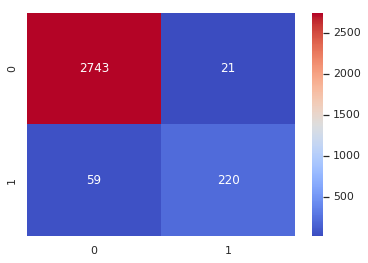

In [0]:
y_val_predict= NN_model.predict(Z_val)

NN_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",NN_model_mse_val)

NN_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(NN_model_cm_val,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9737101544528426
precision 0.9128630705394191
recall 0.7885304659498208
f1score 0.8461538461538461


## Algoritmo: SVM por defecto

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Error MSE:  0.01191454396055875


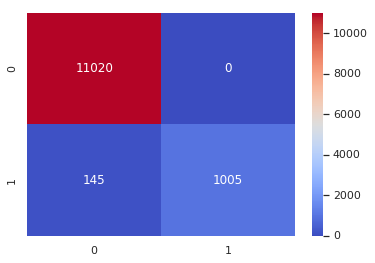

In [0]:
from sklearn.svm import SVC

SVC_model = SVC()
SVC_model.fit(Z_train, y_train)
y_train_predict= SVC_model.predict(Z_train)


SVC_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",SVC_model_mse)

SVC_model_cm = confusion_matrix(y_train, y_train_predict)   
sns.heatmap(SVC_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9880854560394412
precision 1.0
recall 0.8739130434782608
f1score 0.9327146171693734


### Evaluación con data de validacion

Error MSE:  0.07196845218534341


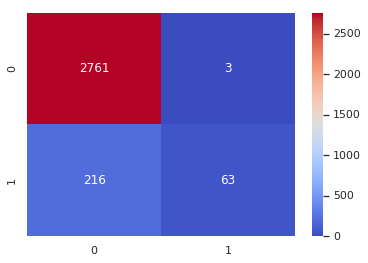

In [0]:
y_val_predict= SVC_model.predict(Z_val)

SVC_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",SVC_model_mse_val)

SVC_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(SVC_model_cm_val,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9280315478146566
precision 0.9545454545454546
recall 0.22580645161290322
f1score 0.3652173913043478


## Algoritmo: Random Forest por defecto

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Error MSE:  0.004847986852917009


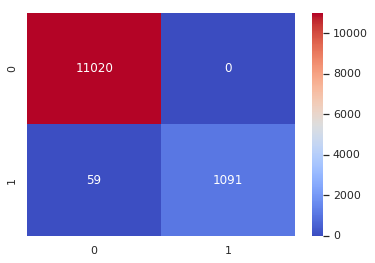

In [0]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(Z_train, y_train)
y_train_predict= RF_model.predict(Z_train)


RF_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",RF_model_mse)

RF_model_cm = confusion_matrix(y_train, y_train_predict)   
sns.heatmap(RF_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.995152013147083
precision 1.0
recall 0.948695652173913
f1score 0.9736724676483713


### Evaluación con data de validación





Error MSE:  0.025632599408478476


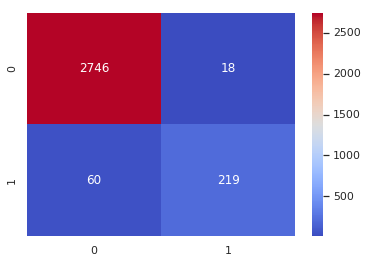

In [0]:
y_val_predict= RF_model.predict(Z_val)

RF_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",RF_model_mse_val)

RF_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(RF_model_cm_val,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9743674005915215
precision 0.9240506329113924
recall 0.7849462365591398
f1score 0.8488372093023255


## Algoritmo: KNN por defecto

Error MSE:  0.02456861133935908


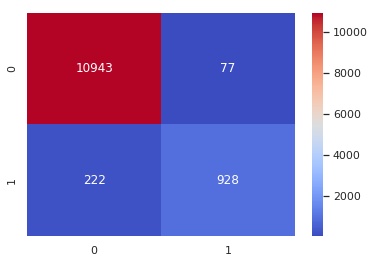

In [0]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(Z_train, y_train)
y_train_predict= KNN_model.predict(Z_train)


KNN_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",KNN_model_mse)

KNN_model_cm = confusion_matrix(y_train, y_train_predict)   
sns.heatmap(KNN_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9754313886606409
precision 0.9233830845771144
recall 0.8069565217391305
f1score 0.8612529002320186


### Evaluación con data de validación

Error MSE:  0.02628984554715741


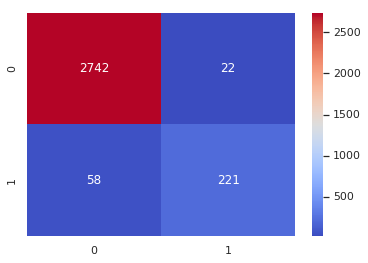

In [0]:
y_val_predict= KNN_model.predict(Z_val)

KNN_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",KNN_model_mse_val)

KNN_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(KNN_model_cm_val,annot=True, fmt="d", cmap="coolwarm")

In [0]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9737101544528426
precision 0.9094650205761317
recall 0.7921146953405018
f1score 0.846743295019157
